<a href="https://colab.research.google.com/github/kytk/AI-MAILs/blob/main/python_3-1_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI-MAILs
# 脳画像解析のためのPython入門: PandasとSeaborn
Ver.20230812


## 参考にした資料
- [Pandas公式ドキュメント(英語)](https://pandas.pydata.org/docs/index.html)
- [Seaborn公式ドキュメント(英語)](https://seaborn.pydata.org/tutorial/introduction)

## 本日使用したデータ
- COBREデータセット http://fcon_1000.projects.nitrc.org/indi/retro/cobre.html
- 背景情報は配布されているcsvファイルの列名だけ編集
- MRI解析情報は独自で解析したもの

## Pandas と Seaborn
- Pandas: Pythonでデータ分析およびデータ操作をするためのツール "Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language."
- Seaborn: Pythonで統計データからグラフを簡便に作成するためのツール "Seaborn is a library for making statistical graphics in Python."

## Pandasでできることの例
- 表を扱う
- 表の記述統計量を出力する
- 表の一部を抽出する
- 複数の列の情報から新しい列を生成する
- PandasのデータフレームはSeabornでのグラフ作成にそのまま使用できる


## PandasとSeabornを使った一例 (本日の目標)
- 2つの表 (被験者の背景情報と被験者のMRI解析結果)から、同じIDがあるものを結合
- 背景情報に、性別、年齢、健常者/患者 の情報が、MRI解析結果には灰白質容積、白質容積、脳脊髄液容積の情報があるため、年齢と灰白質容積の散布図を、性別、健常者/被験者、脳脊髄液容積の情報を付加して図示したい
- 上記2つが、10行未満で達成できる
- 下のコードの意味を今日の講義で説明する
- まずは実行してみる

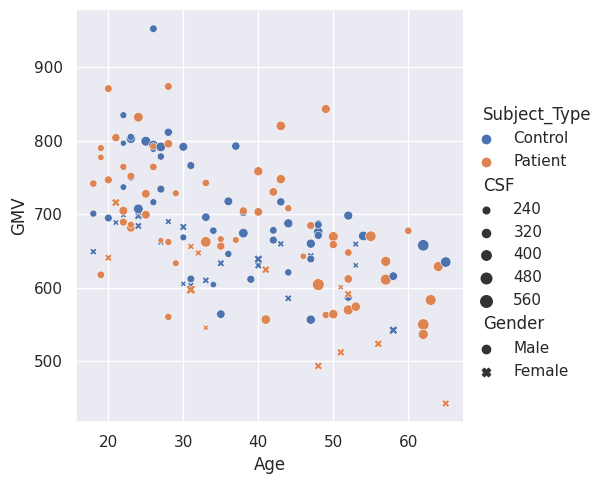

In [2]:
# pandas と seaborn をインポート
import pandas as pd
import seaborn as sns

# seaborn のテーマを設定
sns.set_theme()

# 背景情報の CSV を df_demographics として読み込み
# MRI解析情報の CSV を df_mri として読み込み
![[ -f COBRE_phenotypic_data.csv ]] || wget https://raw.githubusercontent.com/kytk/AI-MAILs/main/COBRE_phenotypic_data.csv
![[ -f COBRE_t1.csv ]] || wget https://raw.githubusercontent.com/kytk/AI-MAILs/main/COBRE_t1.csv
df_demographics = pd.read_csv('/content/COBRE_phenotypic_data.csv')
df_mri = pd.read_csv('/content/COBRE_t1.csv')

# df_demographics と df_mri を 'ID' で結合し、df というデータフレームを生成
df = pd.merge(df_demographics,df_mri,on='ID')

# seaborn で、df を読み込み、x軸に年齢、y軸にGMVを設定し、健常者/患者を色で分け、性別を形で分けて表示
# さらに脳脊髄液によってプロットの大きさを変える
sns.relplot(df,x='Age',y='GMV',hue='Subject_Type',style='Gender',size='CSF')

## Pandas と Seaborn のインポート
- pandas は pd としてインポートされることが多い
- seaborn は sns としてインポートされることが多い

In [3]:
# pandas は pd としてインポートされることが多い
import pandas as pd

# seaborn は sns (seaborn name space) としてインポートされることが多い
import seaborn as sns

## Google colaboratory でのデータの読み込み
- Google colaboratoryで作業をする時、通常は、左にある「ファイル」の下にデータをドラッグ & ドロップする
- そうすると、'/content/ファイル名' でアクセスできる
- 今は、データをダウンロードして使用する
- 下のセルを実行すると、2つのcsvファイルがダウンロードされる

<img src="https://www.nemotos.net/nb/img/colaboratory_file.png" width=300>

In [4]:
# 本日使うデータをダウンロードする
# ファイル名は COBRE_phenotypic_data.csv と COBRE_t1.csv

# (参考)
# ! はPythonからシェルで動かすプログラムを実行したい時につける
# [[ -f COBRE_phenotypic_data.csv ]] は、「COBRE_phenotypic_data.csv というファイルがあるか？」というシェルスクリプトのテスト文
# || は、戻り値が False ならば…　というコマンド
# wget はダウンロードするLinuxのプログラム

![[ -f COBRE_phenotypic_data.csv ]] || wget https://raw.githubusercontent.com/kytk/AI-MAILs/main/COBRE_phenotypic_data.csv
![[ -f COBRE_t1.csv ]] || wget https://raw.githubusercontent.com/kytk/AI-MAILs/main/COBRE_t1.csv

## Pandas の用語: 「データフレーム Data Frame」
- 一般的な表をイメージすればよい
- Pandasでは、ひとつの表を「データフレーム」と呼ぶ
- 行: row; 列: column
- dataframe という名前を略して、 'df' という変数に代入することが多い

<img src="https://www.nemotos.net/nb/img/pandas_01.png" width=400>
図: pandas の公式ドキュメントから引用

## Pandas へのデータの読み込み
- Pandas は、csvファイルやexcelファイルを読み込むことができる
- Excelファイルはいくつか追加パッケージが必要なことがあるため、csvファイルがおすすめ
- Excel は、`pd.read_excel('excelファイル')` で読み込むことができる
- CSVは、`pd.read_csv('csvファイル')` で読み込むことができる
- IDなどは、インデックスとして指定すると取り回しが楽になる

In [5]:
# COBRE_phenotypic_data.csv を df_demographics として読み込み 第0列がインデックス
df_demographics = pd.read_csv('/content/COBRE_phenotypic_data.csv',index_col=0)

# COBRE_t1.csv を df_mri として読み込み 第0列がインデックス
df_mri = pd.read_csv('/content/COBRE_t1.csv',index_col=0)

## Pandas のデータの表示
- 読み込んだデータフレームを df とすると、最初の5行を df.head() で表示できる
- 表の大きさは、df.shape で確認できる

In [6]:
# df_demographics の最初の5行を確認
df_demographics.head()

,Age,Gender,Handedness,Subject_Type,Diagnosis
ID,,,,,
40061,18,Male,Right,Control,None
40090,18,Female,Right,Control,None
40046,18,Male,Left,Patient,295.70 depressed type
40002,19,Male,Right,Patient,295.3
40117,19,Male,Right,Patient,295.3


In [7]:
# df_demographics の表の大きさを確認
# インデックス(ID)以外は146行5列
df_demographics.shape

(146, 5)

In [8]:
# df_mri の最初の5行を確認
df_mri.head()

,GMV,WMV,CSF
ID,,,
40000,640.99,431.95,289.0
40001,664.49,463.15,207.6
40002,617.81,418.59,281.2
40003,874.19,573.03,293.5
40004,670.24,488.44,477.5


In [9]:
# df_mri の表の大きさを確認
# インデックス(ID)以外は142行3列
df_mri.shape

(142, 3)

### データフレームにおけるインデックス
- 今、列IDの要素は、各行における「インデックス」となっている
- このインデックスを指定することで、行の内容を取り出すことができる
- 読み込む際にインデックスを指定しないときはインデックスは0からの連番になる
- インデックスに使われた列は特殊な扱いになるため、列名が他のものと比べて1段下がる

In [12]:
# COBRE_t1.csv を df_mri_without_index として読み込む
df_mri_without_index = pd.read_csv('/content/COBRE_t1.csv')

# df_mri_without_index の最初の5行を表示
df_mri_without_index.head()

#上の表と下の表を比べてみてください

,ID,GMV,WMV,CSF
0,40000,640.99,431.95,289.0
1,40001,664.49,463.15,207.6
2,40002,617.81,418.59,281.2
3,40003,874.19,573.03,293.5
4,40004,670.24,488.44,477.5


## データフレームの横方向への結合
- データフレームは、pd.merge() 関数を使って横方向に結合できる
- 共通するキーを `on='キー'` を使って指定する

### 内部結合と外部結合
- merge には内部結合と外部結合がある
    - *正確には外部結合には、左側、右側、完全の3つがあるが今回は完全外部結合のみ説明
- 内部結合は2つのデータに共通するもののみ結合する(下図ではID04, ID05, ID06のみが結合される)
- 外部結合は2つのデータのすべてが結合する
- 数学で言えば、2つのグループA, B に対し
    - 内部結合は積集合: A∩B
    - 外部結合は和集合: A∪B

<img src="https://www.nemotos.net/nb/img/pandas_02.png" width=300>



- デフォルトは、共通するキーがある行だけが結合される(内部結合)
    - 今の場合、df_demographicsは146行、df_mriは142行なので、共通する142行のみ残る


In [ ]:
# df_demographics と df_mri を 'ID' キーを使って連結し、df というデータフレームを生成する
df = pd.merge(df_demographics, df_mri, on='ID')

In [ ]:
# df の最初の5行だけ表示する
df.head()

In [ ]:
# df の大きさを確認する
# 142行8列
# MRI解析情報がないものは結合されない
df.shape

In [ ]:
# すべてを結合したい場合は、外部結合というものを行う
# 外部結合には、how='outer' と記載する
df_all = pd.merge(df_demographics, df_mri, on='ID',how='outer')

In [ ]:
# df_all.shape で146行8列となる
df_all.shape

## データの記述統計量
- Pandasはデータ解析ツールとうたっているだけあり、簡単な記述統計量は簡単に求められる


In [ ]:
# df.describe() で各項目の記述統計量が求められる
# 連続値の n数、平均、標準偏差、最小値、25パーセンタイル、50パーセンタイル、75パーセンタイル、最大値が一覧で出力される
df.describe()

In [ ]:
# describe() は全部だが、mean(), std(), min(), median(), max() もある
# 中央値を求める
df.median()

- groupby メソッドを使うと、群毎の記述統計量を計算できる

In [ ]:
# groupby メソッドで、Subject_Typeのグループ毎の平均を計算する
df.groupby(by='Subject_Type').mean()

## データの抽出
- Pandas では、カラム名を使って、データの一部を抽出できる

In [ ]:
# 改めて、df の概要をdf.head() で出力する
# デフォルトは5行だが、df.head(3) で3行だけ出力できる
df.head(3)

In [ ]:
# 'GMV' の列だけを抽出したかったら、df['GMV']とする
df['GMV']

In [ ]:
# 取り出した列だけの平均を求めることもできる
df['GMV'].mean()

- 複数のカラムを取り出したい時は、カラム名をリストで作成し、それをdf[[リスト]]とする

In [ ]:
# Age, Gender, GMV を取り出したい
# 考え方として、まず、リストを作成する
# そのリストを df[] の中に入れる
# ['Age', ’Gender’, 'GMV']
df[['Age', 'Gender', 'GMV']]

In [ ]:
# ここでも同じように平均値を求められる
# 連続値のみ平均値が計算される
df[['Age', 'Gender', 'GMV']].mean()

### 練習問題 1
- pandasで複数のカラムを抽出したい時、リストを使うことの意義を感じてもらうために以下を実行してください
- 'Age', 'Subject_Type', 'CSF' の3項目を a というリストに代入してください
- df[a] を実行してみてください


In [ ]:
# あなたの回答
# 'Age' 'Subject_Type' 'CSF' を a というリストに代入
a =
# a を表示
# ['Age', 'Subject_Type', 'CSF'] と表示されれば正解
print(a)

In [ ]:
# df[a] を実行
df[a]

In [ ]:
# 回答例
a = ['Age', 'Subject_Type', 'CSF']
df[a]
# a そのものが [] でくくられているので、df[a] は df[['Age', 'Subject_Type', 'CSF']] と同義
# 慣れるまでは、まず、リストを作成して、それをdf[]に入れるように意識するのがよいかもしれない

## 行の抽出
- 行を抽出したい場合には、locやilocを使う
- loc の後には、取り出したいIDを記載する
- iloc の後には、取り出したい行数を記載する

In [ ]:
# loc は 特定のIDの行を取り出せる
# ID 40003 を取り出す
df.loc[40003]


In [ ]:
# iloc は 行番号で指定した行を取り出せる
# スライシングはPythonの基本と同じ
# 最初の行は0行
# 3行目から5行目を取り出したい時、0から始まるとすると、戴2行から第4行を取り出すということなので、
# 2行以上5行未満と考える
df.iloc[2:5]

In [ ]:
# df.head() で最初の5行を表示することで確認
df.head()

## 条件抽出
- 条件に合致するものだけを抽出することもできる
- df['Age']>20 は、年齢が20歳よりも大きい人をTrueかFalseで返す
- これを df[] の中にいれることでこの条件に合致する人の一覧を作成できる

In [ ]:
# df['Age']>20 は True か False を返す
df['Age'] > 20

In [ ]:
# 上記を df の中に入れてあげることで、Trueのものだけ抽出できる
df[df['Age'] >20]

In [ ]:
# &, |, ~ を使うことで、複数条件を作れる
# ルール
#   &, |, ~ のどれかを使わなければいけない。and, or, notは使えない
#  ひとつひとつの条件をそれぞれ () でくくらないといけない

# 20歳より大きく健常者
(df['Age'] > 20) & (df['Subject_Type'] == 'Control')

In [ ]:
# この条件をdf[] の中に入れてみる
df[(df['Age'] > 20) & (df['Subject_Type'] == 'Control')]

### 練習問題 2
- 'Age' が40歳以上 または 'Gender' が 女性 という条件式を作って b に代入してください
- df[b] を実行してみてください

In [ ]:
# 'Age' が40歳以上または 'Gender' が女性
# ヒント: 40以上は　 >= 40
# ヒント: または　は |
b =
df[b]

In [ ]:
#回答例
b = (df['Age'] >= 40) | (df['Gender'] == 'Female')
df[b]

## 表計算
- Pandas では、項目を計算して新たな列を生成することが簡単にできる

In [ ]:
# 灰白質容積 'GMV', 白質容積 'WMV', 脳脊髄液容積 'CSF' を足して新たに 頭蓋内容積 'ICV' という項目を生成する
df['ICV'] = df['GMV'] + df['WMV'] + df['CSF']

In [ ]:
# 最後の列に ICV ができていることに着目
df.head()

## ファイルの書き出し
- pandas は csv や excel に簡単に保存できる
- メソッド 'to_ファイルの種類' を使う
- df.to_csv('ファイル名')
- df.to_excel('ファイル名')


In [ ]:
# 今の df を 'COBRE.xlsx' というファイル名で出力する
# Google colaboratory の中に生成される。それはダウンロードできる
df.to_excel('COBRE.xlsx')

## Seaborn での可視化
- Seaborn は様々なことができるが、relplot が便利なのでこれを紹介する
- これはデータの関係性を図示するものである
- 今、年齢と灰白質容積(GMV) の関係を図示したい
- そこには性別と病気であるか否かが影響すると考えられるのでそれらを考慮したグラフを作成したい
- さらに、CSFの容積も組み入れてみたい

In [ ]:
# seaborn のテーマを使うには、次のコマンドを実行する
sns.set_theme()

- relplot の使い方は比較的簡単
```
sns.relplot(data=データフレーム,
            x=x軸に使いたいカラム,
            y=y軸に使いたいカラム,
            hue=色を変えたいカラム,
            style=グラフのプロットの形状を変えたいカラム
            size=プロットの大きさを反映したいカラム)
```

In [ ]:
# シンプルに、AgeとGMVの関係を図示する
sns.relplot(data=df, x='Age',y='GMV')

In [ ]:
# hue を使うと、グループを色分けできる
# 今、Subject_Typeで健常者と患者を色分けする
sns.relplot(data=df, x='Age',y='GMV', hue='Subject_Type')

In [ ]:
# style を使うと、グループをプロットの形で判別できる
# 今、Gender で 男性と女性の形状を変えたい
sns.relplot(data=df, x='Age',y='GMV', hue='Subject_Type', style='Gender')

In [ ]:
# sizeを使うと、ひとつひとつのプロットの大きさを変えられる
# プロットに 脳脊髄液容積の値を反映させたい
# CSF の数値をプロットの大きさに反映する
sns.relplot(data=df, x="Age", y="GMV",hue="Subject_Type",style="Gender",size="CSF")

### 練習問題 3
- 加齢と脳脊髄液(CSF)容積の関係をプロットしたいと思います。
- その際、以下の項目を色・形状で分けたいと思います
    - 性別: 色
    - 健常者/患者: 形状
- 上記を参考に以下のようにしてください
- data: df
- x軸: Age
- y軸: CSF
- hue: Gender
- style: Subject_Type
- (sizeは使いません)

In [ ]:
# あなたの回答
sns.relplot(ここにパラメータを記載してください)

In [ ]:
# 回答例
sns.relplot(data=df, x="Age", y="CSF",hue="Gender",style="Subject_Type",)